# DAT 301 Project 2: Data Analysis and Exploration with NBA statistics
## Group Members: Moses Kang, Boon Yeow Koh, Brandon Chan

Throughout professional sports leagues, Team Owners and General Managers are constantly in pursuit of constructing a winning team. There are several schools of thought, some focusing on the individual player, some focusing on the coaching staff, some focusing on the team culture, and many more. There have also been teams that hire statisticians and data scientists to focus on taking the statistical approach to identify what factors strongly influence the performance of a team. Based on these assertions, we wanted to ask the question "What elements of an NBA team make the organization successful? To determine this we decided to observe sections: attributes that impact player stats and the influence of decisions made by the front office. To clarify our method, the front office includes managers, general managers, team owners, and any team-related members.

In order to analyze the different aspects of our project, we sourced datasets from Entertainment and Sports Programming Network (ESPN) and the "Basketball Reference" sites on players and their statistics as well as fan attendance for each team and team standings and winning percentage. 

For our project, we decided to expand and refine our results and data from the previous project. Previously we wanted to look into what factors might affect an NBA team's success as well as see what physical attributes make a professional basketball player better. For team success, we decided to look at how fan support might affect team performance and teams' front office impacts a team. To determine what physical attributes made an impactful basketball player, we decided to look at players' heights and weights and if those traits directly correlated to the average number of points scored, assists made, and times rebounded.

Rather than trying to determine what attributes define a successful NBA basketball player, we decided to see how attributes affect players in different stat lines. Specifically, we chose to see how weight and height, independent of each other, affect Average points scored per game, number of rebounds, 3 point attempts, 2 point attempts, and number of assists. Based on a research paper based on Physical and Performance characteristics of NCAA Division 1 Male basketball players, many attributes were studied, such as speed, height, weight, and strength; however, there seemed to be a greater emphasis on height and weight as those traits directly influenced the development of other attributes. We wanted to see if there was any correlation between height or weight and the mentioned statistics. Rather than analyzing players' data from the 2019-2020 season, we decided to look at all players who have played at least one game in the NBA from 2018 to 2019. This way, we are able to have a larger data set and more accurate observation of how weight and height affect specific stats.

In addition to finding out how weight and height impact an NBA player's stat line, we also wanted to see if an NBA team's front office is able to impact the success of the teams. Specifically, we decided to see how a team is able to scout college-level players and the front office's ability to determine future NBA stars. Additionally, we also wanted to look at how fan support may impact the winning percentage of each team. For the sake of precision, we decided to look at NBA data from the five most recent seasons. While the observation of scouting top college players is a direct analysis of general managers, the observation of fan support is for determining if the presence of more fans leads to a higher winning percentage. We decided to look at fan support based on an article by Psychology Educator. In this article, Psychology Educator explains how "fans have the power to make or break some professionals’ psyche and can enhance or undermine concentration". We wanted to explore this idea by comparing the fan attendance to a team's winning percentage.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import math
import mapclassify
from scipy.stats import linregress

In [2]:
fan_support = pd.read_csv("fan_attendance.csv")
player_stats = pd.read_csv("sportsref_download.csv")
player_bg = pd.read_csv("all_seasons.csv")
team_stats = pd.read_csv("Standings.csv")

# Check to see that there are duplicates of Steven Adams in player background dataset
#player_bg[player_bg["player_name"]=='Steven Adams']

In [3]:
# Remove duplicates and keep the most recent Steven Adams (since it is sorted by year)
player_bg = player_bg.drop_duplicates(subset=['player_name'], keep = 'last')
player_bg[player_bg["player_name"]=='Steven Adams']
# Do the same for player stats dataset
player_stats = player_stats.drop_duplicates(subset=['Player'], keep = 'last')

In [4]:
# Merge player_stats and player_bg for section 1
player_bg.rename(columns = {'player_name':'Player'}, inplace = True)
player_bg_stats = player_bg.merge(player_stats, on='Player')

## Section 1 - Player Attributes
### Part 1 - Player Height

Acccording to research from the Environmental Research of Public health, taller players perform better in basketball. In the reseach, height of the players from the top 16 teams in world basketball championship (FIBA-WC) was compared with the height of the players from the teams ranked below 16. On average the height of the players from the top 16 teams were taller than team ranked below 16 for every single basketball position. In addition, the researchers have discovered that players in first division teams are significantly taller than people in the second division team. Therefore we predict to see the same conclusion from our analysis. 

Text(214, 11, 'r = -0.279\nr²= 0.078')

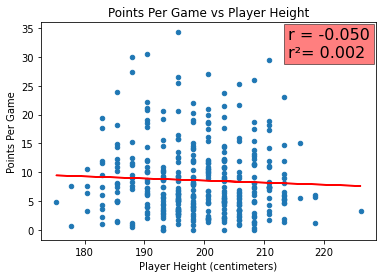

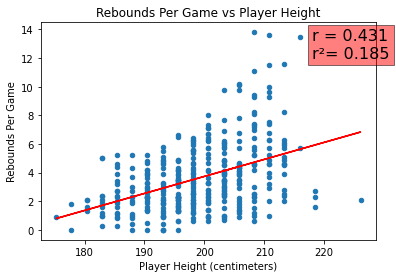

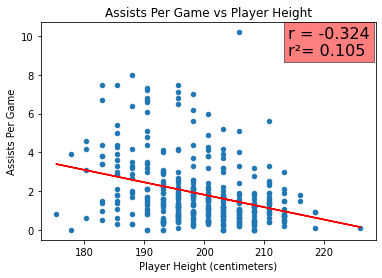

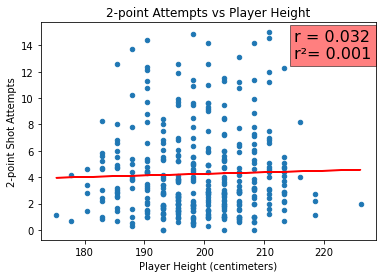

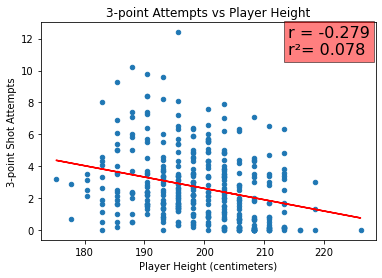

In [5]:
# Section 1:
# Player Height

#put statistics into columns
col1=player_bg_stats["player_height"]
col2=player_bg_stats["PTS"]
col3=player_bg_stats["TRB"]
col4=player_bg_stats["AST"]
col5=player_bg_stats["2PA"]
col6=player_bg_stats["3PA"]

# Correlation coefficent and R squared for all statistics
rPTS = "r = "+"{:.3f}".format(col1.corr(col2))+"\n"+"r\u00b2= "+"{:.3f}".format(col1.corr(col2)**2)
rTRB = "r = "+"{:.3f}".format(col1.corr(col3))+"\n"+"r\u00b2= "+"{:.3f}".format(col1.corr(col3)**2)
rAST = "r = "+"{:.3f}".format(col1.corr(col4))+"\n"+"r\u00b2= "+"{:.3f}".format(col1.corr(col4)**2)
r2PA = "r = "+"{:.3f}".format(col1.corr(col5))+"\n"+"r\u00b2= "+"{:.3f}".format(col1.corr(col5)**2)
r3PA = "r = "+"{:.3f}".format(col1.corr(col6))+"\n"+"r\u00b2= "+"{:.3f}".format(col1.corr(col6)**2)

#Scatter plot
ax1 = player_bg_stats.plot.scatter(x = 'player_height', y = 'PTS')
ax1.set(xlabel='Player Height (centimeters)', ylabel='Points Per Game', title = "Points Per Game vs Player Height")
slope, intercept, r_value, p_value, std_err = linregress(col1, col2)
plt.plot(col1, intercept + slope*col1, 'r', label='fitted line')
plt.text(214, 30, rPTS, fontsize = 16, 
         bbox = dict(facecolor = 'red', alpha = 0.5))

ax2 = player_bg_stats.plot.scatter(x = 'player_height', y = 'TRB') # relationship apparent
ax2.set(xlabel='Player Height (centimeters)', ylabel='Rebounds Per Game', title = "Rebounds Per Game vs Player Height")
slope, intercept, r_value, p_value, std_err = linregress(col1, col3)
plt.plot(col1, intercept + slope*col1, 'r', label='fitted line')
plt.text(218, 12,rTRB, fontsize = 16, 
         bbox = dict(facecolor = 'red', alpha = 0.5))

ax3 = player_bg_stats.plot.scatter(x = 'player_height', y = 'AST') # relationship apparent
ax3.set(xlabel='Player Height (centimeters)', ylabel='Assists Per Game', title = "Assists Per Game vs Player Height")
slope, intercept, r_value, p_value, std_err = linregress(col1, col4)
plt.plot(col1, intercept + slope*col1, 'r', label='fitted line')
plt.text(214, 9, rAST, fontsize = 16, 
         bbox = dict(facecolor = 'red', alpha = 0.5))

ax4 = player_bg_stats.plot.scatter(x = 'player_height', y = '2PA')
ax4.set(xlabel='Player Height (centimeters)', ylabel='2-point Shot Attempts', title = "2-point Attempts vs Player Height")
slope, intercept, r_value, p_value, std_err = linregress(col1, col5)
plt.plot(col1, intercept + slope*col1, 'r', label='fitted line')
plt.text(215, 13, r2PA, fontsize = 16, 
         bbox = dict(facecolor = 'red', alpha = 0.5))

ax5 = player_bg_stats.plot.scatter(x = 'player_height', y = '3PA') # relationship apparent
ax5.set(xlabel='Player Height (centimeters)', ylabel='3-point Shot Attempts', title = "3-point Attempts vs Player Height")
slope, intercept, r_value, p_value, std_err = linregress(col1, col6)
plt.plot(col1, intercept + slope*col1, 'r', label='fitted line')
plt.text(214, 11, r3PA, fontsize = 16, 
         bbox = dict(facecolor = 'red', alpha = 0.5))


The scatter plots above shows how player height can affect basketball performance statistics. We analyzed height with points per game, rebounds per game, assists per game, 2-point attempts, and 3 point attempts. Contrary to our hypothesis, all of the graphs shows moderate to no correlation between height and basketball performance as all of the r and r squared values are below 0.2. One of the shortcomings of our analysis is that we did not factor the play time for each player. Our scatter plots includes players who have a high playing time and players who have a low playing time. Players with a higher playing time are more likely to score more points, get more rebounds and assists than players with a lower playing time. If we factored out the play time, there could be a stronger correlation between height and basketball performance. We did not factor out playtime because of the lack of play time in the data.

The scatterplot with the strongest correlation is between player height and rebounds per game with a correlation coefficient of 0.431 and an r squared value of 0.185. A rebound is when players catch the ball from a missed shot. As the basketball hoop is very tall, a taller player would have a higher chance of catching the ball than a shorter player if it bounces off the hoop. This could explain why there is a positive correlation between height and rebounds per game.

## Section 1 (continued)
### Part 2 - Player Weight

In the second of our project, we decided to continue to look at player attributes, but focus on how Weight affects the performance of a player. Research from the Environmental Research of Public health suggest that heavier players perform better than lighter players. This aligns with our hypothesis which states that weight can help with defense, rebounding, and overall performance as heavier players have more strength to block and push players for leverage to catch the ball.

Text(125, 11, 'r = -0.224\nr²= 0.050')

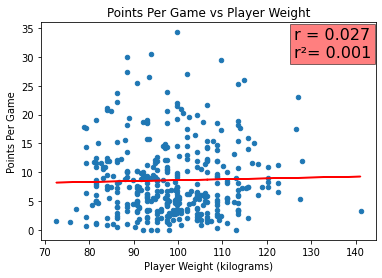

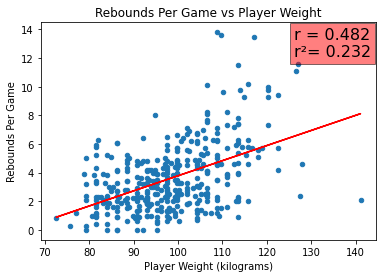

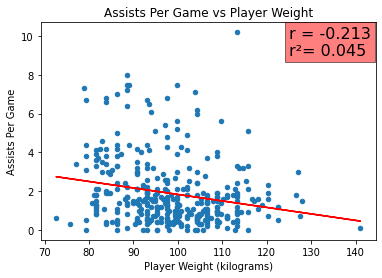

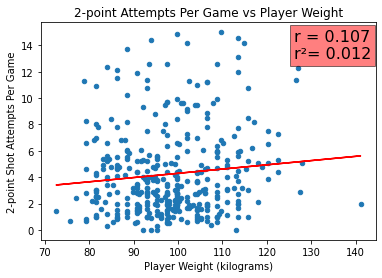

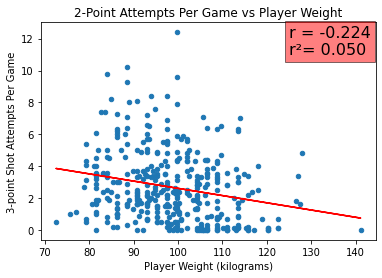

In [6]:
# Section 1
#put statistics into columns
col1=player_bg_stats["player_weight"]

# Correlation coefficent and R squared for all statistics
rPTS = "r = "+"{:.3f}".format(col1.corr(col2))+"\n"+"r\u00b2= "+"{:.3f}".format(col1.corr(col2)**2)
rTRB = "r = "+"{:.3f}".format(col1.corr(col3))+"\n"+"r\u00b2= "+"{:.3f}".format(col1.corr(col3)**2)
rAST = "r = "+"{:.3f}".format(col1.corr(col4))+"\n"+"r\u00b2= "+"{:.3f}".format(col1.corr(col4)**2)
r2PA = "r = "+"{:.3f}".format(col1.corr(col5))+"\n"+"r\u00b2= "+"{:.3f}".format(col1.corr(col5)**2)
r3PA = "r = "+"{:.3f}".format(col1.corr(col6))+"\n"+"r\u00b2= "+"{:.3f}".format(col1.corr(col6)**2)

# Player Weight
ax1 = player_bg_stats.plot.scatter(x = 'player_weight', y = 'PTS')
ax1.set(xlabel='Player Weight (kilograms)', ylabel='Points Per Game', title = "Points Per Game vs Player Weight")
slope, intercept, r_value, p_value, std_err = linregress(col1, col2)
plt.plot(col1, intercept + slope*col1, 'r', label='fitted line')
plt.text(126, 30, rPTS, fontsize = 16, 
         bbox = dict(facecolor = 'red', alpha = 0.5))

ax2 = player_bg_stats.plot.scatter(x = 'player_weight', y = 'TRB') # relationship apparent
ax2.set(xlabel='Player Weight (kilograms)', ylabel='Rebounds Per Game', title = "Rebounds Per Game vs Player Weight")
slope, intercept, r_value, p_value, std_err = linregress(col1, col3)
plt.plot(col1, intercept + slope*col1, 'r', label='fitted line')
plt.text(126, 12.1,rTRB, fontsize = 16, 
         bbox = dict(facecolor = 'red', alpha = 0.5))

ax3 = player_bg_stats.plot.scatter(x = 'player_weight', y = 'AST') # relationship apparent
ax3.set(xlabel='Player Weight (kilograms)', ylabel='Assists Per Game', title = "Assists Per Game vs Player Weight")
slope, intercept, r_value, p_value, std_err = linregress(col1, col4)
plt.plot(col1, intercept + slope*col1, 'r', label='fitted line')
plt.text(125, 9, rAST, fontsize = 16, 
         bbox = dict(facecolor = 'red', alpha = 0.5))

ax4 = player_bg_stats.plot.scatter(x = 'player_weight', y = '2PA')
ax4.set(xlabel='Player Weight (kilograms)', ylabel='2-point Shot Attempts Per Game', title = "2-point Attempts Per Game vs Player Weight")
slope, intercept, r_value, p_value, std_err = linregress(col1, col5)
plt.plot(col1, intercept + slope*col1, 'r', label='fitted line')
plt.text(126, 13, r2PA, fontsize = 16, 
         bbox = dict(facecolor = 'red', alpha = 0.5))

ax5 = player_bg_stats.plot.scatter(x = 'player_weight', y = '3PA') # relationship apparent
ax5.set(xlabel='Player Weight (kilograms)', ylabel='3-point Shot Attempts Per Game', title = "2-Point Attempts Per Game vs Player Weight")
slope, intercept, r_value, p_value, std_err = linregress(col1, col6)
plt.plot(col1, intercept + slope*col1, 'r', label='fitted line')
plt.text(125, 11, r3PA, fontsize = 16, 
         bbox = dict(facecolor = 'red', alpha = 0.5))

The scatter plots above shows how player weight can affect basketball performance statistics. We analyzed weight with the same basketball statistics as height. Similarly to height,  all of the graphs shows moderate to no correlation between height and basketball performance as all of the r and r squared values are below 0.3. 

The scatterplot with the strongest correlation is between player weight and rebounds per game with a correlation coefficient of 0.482 and an r squared value of 0.232. A player with a heavier weight is more likely able to push out lighter players in order to get a rebound, which could explain why there is a positive correlation between weight and rebounds per game. Also, basketball teams generally choose their tallest players to be in the center or power foward position which is near the net to defend and catch rebounds. Generally those players tend to weigh more as they are tall and their weight can help them with defense.

## Section 2 - Affect of The Front Office on NBA Team Performance
### Part 1 - Fan Support

In the second section of the report, we look at how fan support affects the overall team performance. The importance of fan support in the success of teams has been widely researched in various professional sports leagues. Some researchers and psychologists believe that the presence of fans at home games contribute heavily to the confidence and comfort of the home team. The article “The Psychology of Sports Fans: How Fans Affect Players” discusses ways that fan support affects the performance of the home team in NBA games.

In this section of the report, we use data from the 20190-2020 season in the NBA that contain information on the arena occupancy and the team win-loss ratio. We then visualized this data by plotting the team’s winning ratio against the arena occupancy. The assumption made in this analysis is that a higher occupancy of the arena means that fan support is stronger, which is a fair assumption and deduction.

In [7]:
# Section 2 , Part 1 - Variables that affect team performance
team_stats_fan = fan_support.merge(team_stats, on = "TEAM")

Text(101, 0.7, 'r = 0.409\nr²= 0.167')

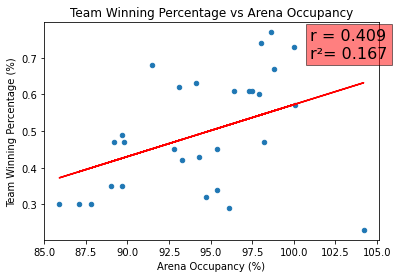

In [8]:
col1=team_stats_fan["PCT"]
col2=team_stats_fan["Win PCT"]
rPCT = rPTS = "r = "+"{:.3f}".format(col1.corr(col2))+"\n"+"r\u00b2= "+"{:.3f}".format(col1.corr(col2)**2)
ax = team_stats_fan.plot.scatter(x = 'PCT', y = 'Win PCT')
ax.set(xlabel='Arena Occupancy (%)', ylabel='Team Winning Percentage (%)', title = "Team Winning Percentage vs Arena Occupancy")
slope, intercept, r_value, p_value, std_err = linregress(col1, col2)
plt.plot(col1, intercept + slope*col1, 'r', label='fitted line')
plt.text(101, 0.7, rPCT, fontsize = 16, 
         bbox = dict(facecolor = 'red', alpha = 0.5))

Evident from the plot, we can see that fan support does indeed play a role in the team’s success. This can be seen by the large R and R-squared values 0.409 and 0.167 respectively. It also supports our hypothesis that fan support is a crucial element in the team’s success. Several research papers have also drawn this conclusion that aligns with our deduction. 

## Section 2 (continued)
### Part 2 - Colleges that produce the Best NBA Players

When searching for players to draft, sign, or trade for, GM’s and the front office of NBA teams look at several factors and characteristics a player possesses. For example, as shown in section 1 of this report, physical attributes can be an indicator on how a player will perform in the NBA (taller players tend to have more rebounds per game, but fewer 3-point shot attempts). Another key indicator of a player’s performance and success in the league is the college they attended and played for. According to several studies (such as “One and Done: Examining the Relationship Between Years of College Basketball Experience and Career Statistics in the National Basketball Association” and “The Effects of College Education on Career Earnings in the NBA”) , schools can play a crucial role in determining a player’s success in the NBA because of the strong influence that college coaches have on players at a young age, the training habits that players develop, and the education that they receive. Therefore, in this section, we determine which schools produce the most NBA players, and which schools produce the most *successful* NBA players. 

[Text(0.5, 0, 'College'),
 Text(0, 0.5, 'Average Points Per Game by Alumni'),
 Text(0.5, 1.0, 'College Alumni Performance in the NBA')]

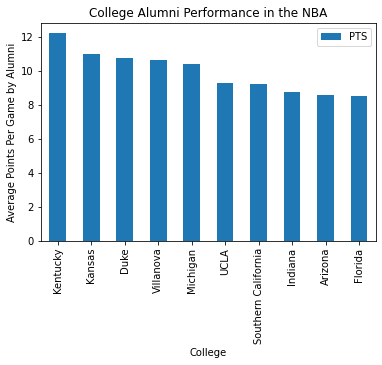

In [9]:
# Section 2 , Part 2 - Colleges that produce the most NBA players

# Finding schools with less than 5 players in the NBA
college_num = player_bg_stats.groupby('college').size().reset_index()
delete_schools = college_num[college_num[0]<=5]
delete_schools = delete_schools[['college']]
delete_schools

# Removing those schools
new_college = player_bg_stats[~player_bg_stats.college.isin(delete_schools.college)]
college_pts = new_college.groupby('college')['PTS'].mean().reset_index()
sorted_college_pts = college_pts.sort_values(by="PTS",ascending=False).iloc[0:10]

# Plotting top 10 schools with alumni scoring highest PPG in the NBA
ax = sorted_college_pts.plot.bar(x='college',y='PTS',rot=0)
ax.set_xticklabels(sorted_college_pts["college"],rotation=90)
ax.set(xlabel='College', ylabel='Average Points Per Game by Alumni', title = "College Alumni Performance in the NBA")


In the first plot, we identify which schools produce the most NBA players. We took the dataset containing each players’ background information, which contains the college they attended. We then used the groupby() function to group the players by their alma mater. After which, we took the mean of the player’s Points Per Game scored for all the players that attended the same college. We then took the top 10 schools with the highest Average Points Per Game their players score. As shown in the plot, Kentucky produces players that go on to score the most points in the NBA, followed by Kansas, Duke, Villanova, so on and so forth. 

It is important to note that we excluded schools that produced less than 5 NBA players in the last 24  years because the mean would not be indicative to how well the average player from that school is. For example, Weber State has only produced one NBA player, Damian Lillard, in the last 20 years, and he has performed extraordinarily averaging 30 points per game. However, if this was included in the analysis, we would see that the average player from Weber State averages 30 points per game in the NBA, leading us to think that Weber State’s basketball program produces great NBA players. In reality, Damian Lillard is an anomaly and the only player from Weber State to play in the NBA in the last 20 years. 

[Text(0.5, 0, 'College'),
 Text(0, 0.5, 'Number of Players'),
 Text(0.5, 1.0, 'College Alumni Appearances in NBA Conference Finals')]

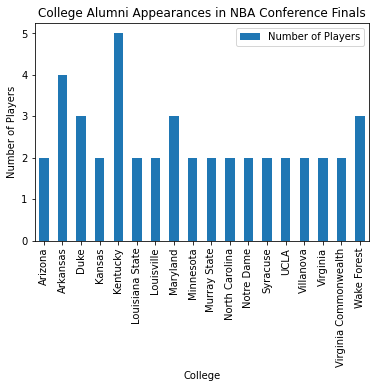

In [17]:
# Section 2 , Part 3 - Breakdown of the past 5 championship teams (looking at players' alma mater)

champ2021 = player_bg[((player_bg["team_abbreviation"]=='PHX')|(player_bg["team_abbreviation"]=='LAC')|(player_bg["team_abbreviation"]=='MIL')|(player_bg["team_abbreviation"]=='ATL'))&(player_bg["season"]=='2020-21')]
champ2020 = player_bg[((player_bg["team_abbreviation"]=='LAL')|(player_bg["team_abbreviation"]=='DEN')|(player_bg["team_abbreviation"]=='MIA')|(player_bg["team_abbreviation"]=='BOS'))&(player_bg["season"]=='2019-20')]
champ2019 = player_bg[((player_bg["team_abbreviation"]=='GSW')|(player_bg["team_abbreviation"]=='POR')|(player_bg["team_abbreviation"]=='TOR')|(player_bg["team_abbreviation"]=='MIL'))&(player_bg["season"]=='2018-19')]
champ2018 = player_bg[((player_bg["team_abbreviation"]=='GSW')|(player_bg["team_abbreviation"]=='HOU')|(player_bg["team_abbreviation"]=='CLE')|(player_bg["team_abbreviation"]=='BOS'))&(player_bg["season"]=='2017-18')]
champ2017 = player_bg[((player_bg["team_abbreviation"]=='GSW')|(player_bg["team_abbreviation"]=='SAS')|(player_bg["team_abbreviation"]=='CLE')|(player_bg["team_abbreviation"]=='BOS'))&(player_bg["season"]=='2016-17')]

champ = champ2021.append(champ2020).append(champ2019).append(champ2018).append(champ2017)

college_num = champ.groupby('college').size().reset_index()
college_num = college_num[(college_num[0]>1)&(college_num["college"]!='None')]
college_num.rename(columns = {0:"Number of Players"}, inplace = True)
college_num.rename(columns = {'college':"College"}, inplace = True)

ax = college_num.plot.bar(x='College',y='Number of Players',rot=0)
ax.set_xticklabels(college_num["College"],rotation=90)
ax.set(xlabel='College', ylabel='Number of Players', title = "College Alumni Appearances in NBA Conference Finals")


In the second plot, we look at the profile of the players that have reached the NBA Playoffs Conference Finals in the past 5 years. Since the 4 best teams reach the Conference Finals, we took this achievement as an indicator of a successful player, which we believe is a fair assumption. We then grouped the players by the school they attended and plotted a distribution of which schools produced the most alumni that appeared in the NBA Conference Finals. We can see several similarities in this plot and the first plot – schools like Kentucky, Duke, Villanova, Arizona all produce players that average a large amount of points per game and appear in the NBA Conference Finals. 

This further solidifies our hypothesis that schools play a crucial role in determining the success of players in the NBA.

## Conclusion
My team wanted to find what characteristics created a successful NBA career. To achieve this, we split our project to two concentrations - how a player's physical attributes affect their basketball statistics and how a team's front office, that being managers and general managers. For how physical attributes may impact performance, we decided to look at how height and weight impacts average points, rebounds, assists, 3 point attempts, and 2 point attemps. By looking at data from ESPN on player statistics, we determined that players with lower weight and height had higher assists and 3 point attempts per game while players with higher weight and height had more rebounds and 2 point attemps per game. To determine how an NBA team's front office impacts the team's success, we looked at fan attendance and winning percentage as well as how well a general manager is able to get atheletes from top universities to play for their teams. We determined that having more fan attendence positively impacted the team's winning percentage. Additionally, we determined the schools that curated top atheltes and crossed that information with how many players are on specific NBA teams. We found that the teams who make it to the conference finals are more likely to have more players from top schools. 

## Citations 
Baechle, T., Berg, K., Latin R. W. "Physical and Performance Charateristics of NCAA Division I Male Basketball 
Players". _Journal of Strength and Conditioning Research_. 8(4) p 214-218. 1994.

Psychology Educator. "The Psychology of Sports Fans: How Fans Affect Players". _Psycology Educator_. Sports. 15 Aug, 2015.

Cirtautas, J. "NBA Players Biometric, biographic and basic box score features from 1996 to 2019 season". _Kaggle_. Feb, 2021. 

"NBA Attendance Report - 2021". _ESPN_. 2021.

"2018-19 NBA Player Stats: Per Game". _Basketball Reference_. 2019.

"2019-20 NBA Standings". _Basketball Reference_. 2020.

Zarić, Ivan, et al. “Body Height of Elite Basketball Players: Do Taller Basketball Teams Rank Better at the FIBA World Cup?” MDPI, Multidisciplinary Digital Publishing Institute, 30 Apr. 2020, https://www.mdpi.com/1660-4601/17/9/3141. 

George L., Kuo-Liang C., Michael H. "The Effects of College Education on Career Earnings in the NBA". South Dakota State University. 2013.

Colin Z., Jessie D., Noah B., Jeff S., Keith H., "One and Done: Examining the Relationship Between Years of College Basketball Experience and Career Statistics in the National Basketball Association". Journal of Sport and Social Issues. May 2020
